In [13]:
import numpy as np
import matplotlib.pyplot as plt

import pywt.data
import sys
import cv2

if '..' not in sys.path:
    sys.path.append('..')

from stego.transform import blocking, dwt
from stego import codec, correction_codes, message

In proposed MDLE-IWT method, 
1. IWT is first appliedto the cover image to obtain four wavelet coefficient sub-bands asembedding regions.
1. The embedding sub-bands order in the algorithm is HL, LH, HH, and LL. 
1. Next, the embedding sub-band is divided into 3×3 non-overlapping blocks
1. MDLE scheme is applied to each block


In [14]:
original = pywt.data.camera()
iwt = dwt.Iwt('haar', level=1)

In [15]:
iwt.forward(original)
secret_message = correction_codes.prepare_message("Apollo 17")

In [16]:
decimal_message = message.message_to_dec(secret_message)
detail_coefficients: list[np.ndarray] = list(iwt.coefficients[-1])
ll_coefficient = iwt.coefficients[0]

In [17]:

message_iterator = iter(decimal_message)

for band in [ll_coefficient] + detail_coefficients:
    codec.encode_band(band, message_iterator)


In [18]:
iwt.coefficients[-1] = tuple(detail_coefficients)
iwt.coefficients[0] = ll_coefficient


stego_img = iwt.inverse()
stego_img.shape

(512, 512)

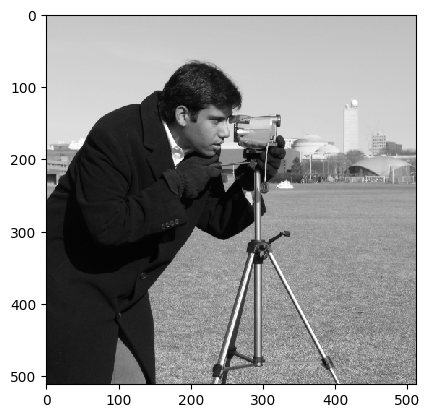

In [19]:

plt.imshow(stego_img, interpolation="nearest", cmap=plt.cm.gray)
# cv2.imwrite("comp.png", stego_img)
# img = cv2.imread("comp.png")
# stego_from_file, g, b = cv2.split(img)
# print(f"{np.allclose(stego_img, stego_from_file)=}")
# stego_img = stego_from_file
# plt.imshow(stego_img, interpolation="nearest", cmap=plt.cm.gray)
# stego_img.shape


## Extracting

In [20]:
stego_img = blocking.pad_image(stego_img, 3)
# extract
iwt.forward(stego_img)

detail_coefficients: list[np.ndarray] = list(iwt.coefficients[-1])
ll_coefficient = iwt.coefficients[0]


In [21]:
encoded_data = []

for band in [ll_coefficient] + detail_coefficients:
    encoded_data += codec.decode_band(band)


In [22]:
message = message.dec_to_message(encoded_data)

In [23]:
print(f"{message[:255]=}")

message[:255]='\x0fC|[[\x14TTW?ǖ< 0\x01\x19\x9b\x05moCQIQ;\x08}b6Q\x13h\x18Kvc\x18\x15{M+Qį"4\x16ro1\n\x1a.\x02\x1c\x0c\x7f\x1cFH\x03X\ns\n\x00i1[Saq`1R=Q\x1f\x16\x03[t\x0b\x01od\x109\x18vѰ{\x03\x0b\'"\x06$-0ѕvzM\xadtg!D\x9d"]?R\x15E\x058\x1dY\x1a*Wf\x03,!#*\tP\\6\x19\x16]f}%B!\x00$d,\x00@\x19S*\x0eE\x08\n\U00056ab2翦̚\x06\x1f*\x08ⵊu\x1bD\x01x<AWs*Q31G?\x1e(2?6bE`9\x15=\x075{\x00UuCn\x07\x7f2\x12t\x06<\x07JSTC(\x051\x00y~`PhήK1l\x04\x01`kW\x1f\x7fӕN\x17[\x10c\x0e%\x16_\x1fiUAW;lN\x00rKpX\n\x17\x128q'


In [24]:
correction_codes.decode_message(message[:255])

IndexError: array index out of range